In [1]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### **Load the data**

In [3]:
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [4]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
labels =  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(train_labels[0])               

9


**Rescale the image values to be in range [0, 1]**

In [6]:
train_images = train_images / 255.
test_images = test_images / 255.

**Display an image**

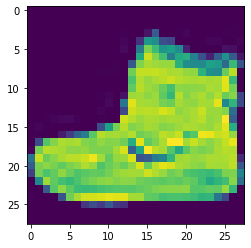

label: Ankle boot


In [7]:
i = 0
img = train_images[i, :, :]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

### **Define a model**


In [8]:
model = Sequential([
  Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=(3, 3)),
  Flatten(),
  Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


####**Compile Model**

In [10]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(), tf.keras.metrics.MeanAbsoluteError()]
)

In [11]:
print(model.optimizer)
print(model.loss)
print(model.metrics)

[]


####**Train Model - Fit method**

```
Syntax:
history = # the progress of the network during training (ex. loss, metrics)
  model.fit(X_train,    # X_train shape (num_samples, num_features)
            y_train,    # y_train shape (num_samples, num_classes)
                        # for sparse_categorical: y_train shape (num_samples,) and need to use loss function sparse_categorical_crossentropy
            epochs=10,  # one epoch: training passes through whole dataset,
            batch_size, # batch_size: number of samples to work through before updating the internal model parameters.)
```

In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
train_images[..., np.newaxis]
train_images.shape

(60000, 28, 28)

In [16]:
history = model.fit(train_images[..., np.newaxis], 
                    train_labels, 
                    epochs=8, 
                    batch_size=256,
                    verbose=2) 

Epoch 1/8
235/235 - 11s - loss: 0.3462 - sparse_categorical_accuracy: 0.8765 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 - 11s - loss: 0.3264 - sparse_categorical_accuracy: 0.8838 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 - 11s - loss: 0.3124 - sparse_categorical_accuracy: 0.8882 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 - 11s - loss: 0.3021 - sparse_categorical_accuracy: 0.8913 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 - 11s - loss: 0.2921 - sparse_categorical_accuracy: 0.8960 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 - 11s - loss: 0.2861 - sparse_categorical_accuracy: 0.8976 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 - 11s - loss: 0.2802 - sparse_categorical_accuracy: 0.8998 - mean_absolute_error: 4.4200
Epoch 8/8
235/235 - 11s - loss: 0.2803 - sparse_categorical_accuracy: 0.8988 - mean_absolute_error: 4.4200


**Plot training history**

In [17]:
type(history)

tensorflow.python.keras.callbacks.History

In [19]:
# history.history

In [21]:
df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.346231,0.876500,4.420002
1,0.326381,0.883750,4.420000
2,0.312390,0.888167,4.420000
3,0.302140,0.891300,4.420001
4,0.292073,0.896000,4.420001


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

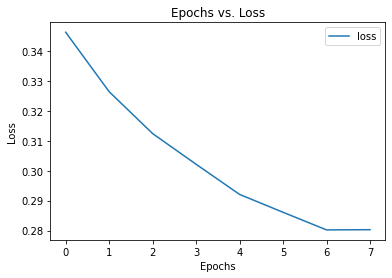

In [22]:
loss_plot = df.plot(y='loss', title='Epochs vs. Loss')
loss_plot.set(xlabel="Epochs", ylabel='Loss')